In [2]:
# Tim's additions
# https://keras.io/getting_started/#tensorflow-compatibility
# as of Jan 19, 2024 the latest version of tensorflow available in PIP is 2.15.0

# can uncomment these two lines on the very FIRST run
# ! pip3 install --upgrade pip
# ! pip uninstall -y keras tensorflow

# ! pip install tensorflow==2.13.0 keras==2.13.0    # pip install failed
# ! pip install tensorflow==2.14.0 keras==2.14.0    # pip installed successfully, but runtime failed with ImportError: cannot import name 'cast' from partially initialized module 'keras.src.backend'
# ! pip install tensorflow==2.15.0 keras==2.15.0    # pip installed successfully, but runtime failed with ImportError: cannot import name 'cast' from partially initialized module 'keras.src.backend'
# ! pip install tensorflow==2.15.0 keras==3.0.0     # pip installed successfully, but runtime failed with ModuleNotFoundError: No module named 'keras.models'
# ! pip install tensorflow==2.16.0 keras==3.0.0     # pip install failed

# this fixed this issue
! pip install keras tf-nightly

# but now got a new issue in sklearn: AttributeError: 'NoneType' object has no attribute 'split'
#   Upgrade threadpoolctl to version >3.

! pip install threadpoolctl>3.0


import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])))



tf.Tensor(-1344.5741, shape=(), dtype=float32)


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()


In [4]:
print('Target variables  : ', dataset['target_names'])

(unique, counts) = np.unique(dataset['target'], return_counts=True)

print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

Target variables  :  ['malignant' 'benign']
Unique values of the target variable [0 1]
Counts of the target variable : [212 357]


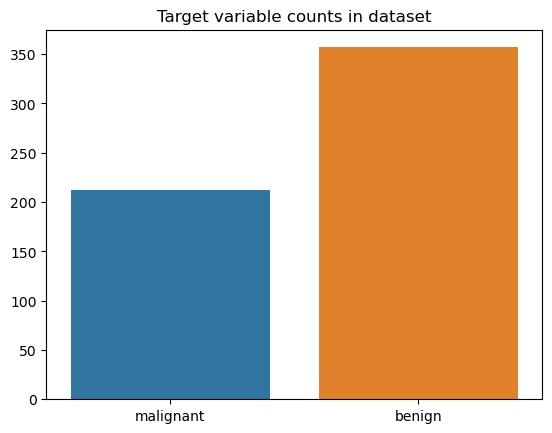

In [5]:
sns.barplot(x=dataset['target_names'], y=counts)
plt.title('Target variable counts in dataset')
plt.show()

In [6]:
X = dataset['data']
y = dataset['target']

In [7]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
predictions = model.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  88
False Positive(FP) =  3
True Negative(TN)  =  50
False Negative(FN) =  2
Accuracy of the binary classification = 0.965


In [12]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()


In [13]:
# Neural Networks

In [14]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=30))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

/usr/local/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)               │      3,968 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 1)                 │        129 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4437 - loss: 0.9620 - val_accuracy: 0.6122 - val_loss: 0.7115
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6263 - loss: 0.6623 - val_accuracy: 0.8236 - val_loss: 0.4955
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8502 - loss: 0.4580 - val_accuracy: 0.9035 - val_loss: 0.3752
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8938 - loss: 0.3468 - val_accuracy: 0.9019 - val_loss: 0.3067
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9207 - loss: 0.2831 - val_accuracy: 0.9069 - val_loss: 0.2636
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9341 - loss: 0.2341 - val_accuracy: 0.9069 - val_loss: 0.2348
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9476 - loss: 0.1933 - val_accuracy: 0.9069 - val_loss: 0.2144
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9524 - loss: 0.1762 - val_accuracy: 0.9069 - val_loss: 0.1995
Epoch 9

[]

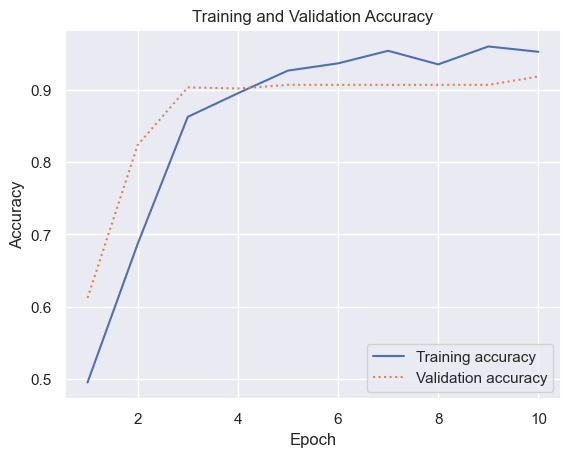

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [17]:
accu_net=hist.history['accuracy'][-1]


A typical accuracy score computed by divding the sum of the true positives and true negatives by the number of test samples isn't very helpful because the dataset is so imbalanced. Use a confusion matrix to visualize how the model performs during testing.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


Text(110.44999999999997, 0.5, 'Actual label')

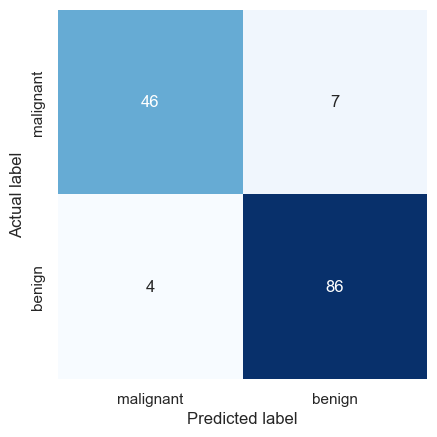

In [18]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['malignant', 'benign']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

In [ ]:
append

In [ ]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()